# Load data

In [1]:
X = catalog.datasets.train__prm_joined.load()
X

/anaconda3/envs/kedro-session/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,...,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
Patient_ID,Health_Camp_ID,,,,,,,,,,,,,,,,,,,,,
489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,...,NaN,NaN,2004-12-06,,,2005-08-16,2005-10-14,Third,G,2
507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,...,75.0,40.0,2004-09-08,C,Others,2005-08-16,2005-10-14,Third,G,2
523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,...,NaN,NaN,2004-06-22,,,2005-10-17,2007-11-07,Second,A,2
524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,...,NaN,NaN,2004-02-07,I,,2004-02-01,2004-02-18,First,E,2
521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,...,70.0,40.0,2003-07-04,I,Technology,2006-03-30,2006-04-03,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500969,6539,2005-01-03,0,0,0,0,0,0,0,0,0,...,NaN,NaN,2004-08-14,,,2004-08-07,2005-02-12,First,F,2
511952,6528,2006-02-13,0,0,0,0,0,1,1,1,0,...,73.0,51.0,2004-09-12,I,Real Estate,2006-02-10,2006-04-25,Third,G,2
521236,6554,2005-05-24,0,0,0,0,0,0,0,0,0,...,92.0,37.0,2005-05-11,G,Software Industry,2005-06-19,2005-07-01,First,B,2


In [2]:
X.dtypes

/anaconda3/envs/kedro-session/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Registration_Date    datetime64[ns]
Var1                          int64
Var2                          int64
Var3                          int64
Var4                          int64
Var5                          int64
Online_Follower               int64
LinkedIn_Shared               int64
Twitter_Shared                int64
Facebook_Shared               int64
Income                      float64
Education_Score             float64
Age                         float64
First_Interaction    datetime64[ns]
City_Type                    object
Employer_Category            object
Camp_Start_Date      datetime64[ns]
Camp_End_Date        datetime64[ns]
Category1                    object
Category2                    object
Category3                     int64
dtype: object

["We [CatBoost] don't do any specific treatment for dates. We support only categorical features and numerical features, you should do the proprocessing [sic] that is suitable for your task for dates before passing them as numeric features or categories to the algorithm."](https://github.com/catboost/catboost/issues/706#issuecomment-468369369)

In [3]:
from pandas.api.types import is_datetime64_dtype

X.drop(columns=[c for c in X.columns if is_datetime64_dtype(X[c])], inplace=True)
X

,,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3
Patient_ID,Health_Camp_ID,,,,,,,,,,,,,,,,,
489652,6578,4,0,0,0,2,0,0,0,0,NaN,NaN,NaN,,,Third,G,2
507246,6578,45,5,0,0,7,0,0,0,0,1.0,75.0,40.0,C,Others,Third,G,2
523729,6534,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,,Second,A,2
524931,6535,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,I,,First,E,2
521364,6529,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,I,Technology,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500969,6539,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,,,First,F,2
511952,6528,0,0,0,0,0,1,1,1,0,3.0,73.0,51.0,I,Real Estate,Third,G,2
521236,6554,0,0,0,0,0,0,0,0,0,1.0,92.0,37.0,G,Software Industry,First,B,2


In [4]:
y = catalog.datasets.tgt_health_camp_outcome_favorable.load()
y

/anaconda3/envs/kedro-session/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,tgt_health_camp_outcome_favorable
Patient_ID,Health_Camp_ID,
489652,6578,1
507246,6578,0
523729,6534,1
524931,6535,0
521364,6529,1
...,...,...
500969,6539,0
511952,6528,1
521236,6554,1


# Visualize feature importances

Adapted from https://github.com/slundberg/shap#tree-ensemble-example-with-treeexplainer-xgboostlightgbmcatboostscikit-learnpyspark-models.

In [5]:
import shap
from catboost import CatBoostClassifier, Pool
from pandas.api.types import is_object_dtype

# load JS visualization code to notebook
shap.initjs()

# train CatBoost model
cat_features=[c for c in X.columns if is_object_dtype(X[c])]
model = CatBoostClassifier(cat_features=cat_features)
model.fit(X, y, verbose=False, plot=False)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Pool(X, y, cat_features=cat_features))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

/anaconda3/envs/kedro-session/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


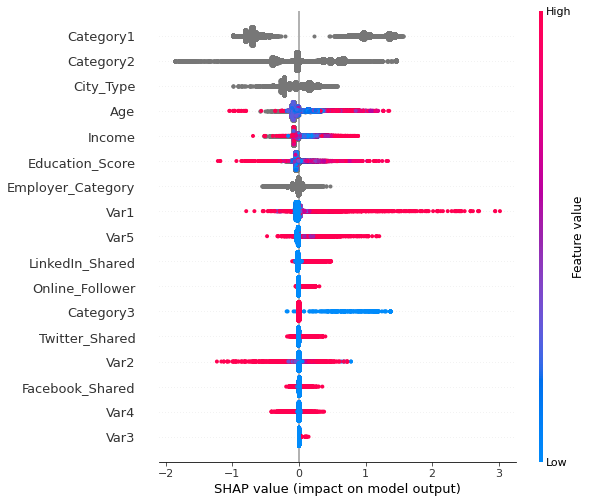

In [6]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

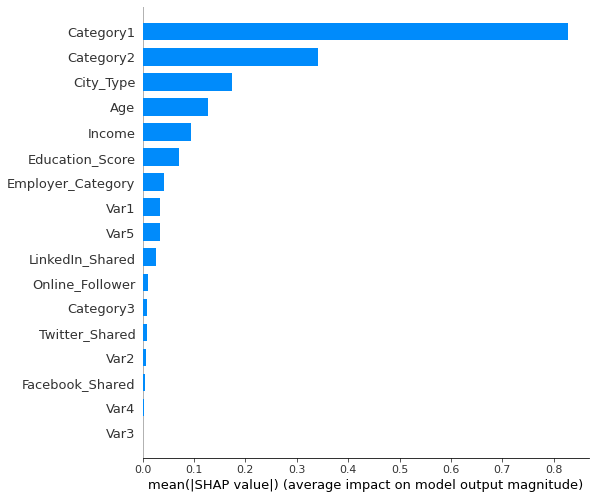

In [7]:
shap.summary_plot(shap_values, X, plot_type="bar")